<a href="https://colab.research.google.com/github/Nielspace/Netpuneai-Tutorials/blob/main/Overfitting_Vs_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

# Model Basics


In [26]:
true_f = lambda X: np.cos(3.5 * np.pi * X)

In [27]:
X = np.sort(np.random.rand(100))

In [28]:
y = true_f(X) + np.random.randn(100) * 0.1

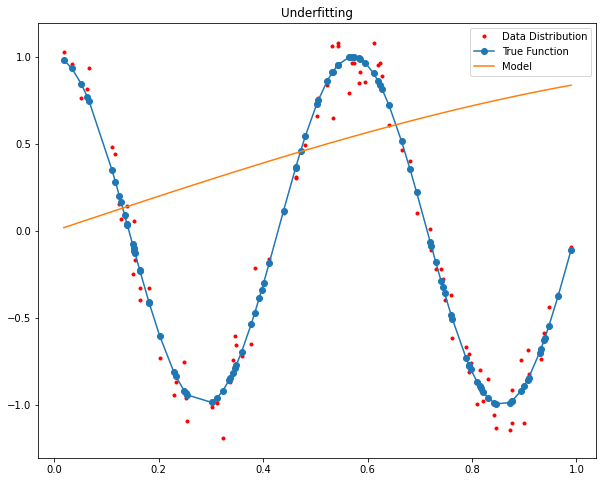

In [29]:
plt.figure(figsize=(10,8))
plt.plot(X,y,'r.', label='Data Distribution')
plt.plot(X, true_f(X), '-o', label='True Function')
plt.plot(X, np.sin(X),label='Model' )
plt.title("Underfitting")
plt.legend()
plt.show()

## Model Capacity


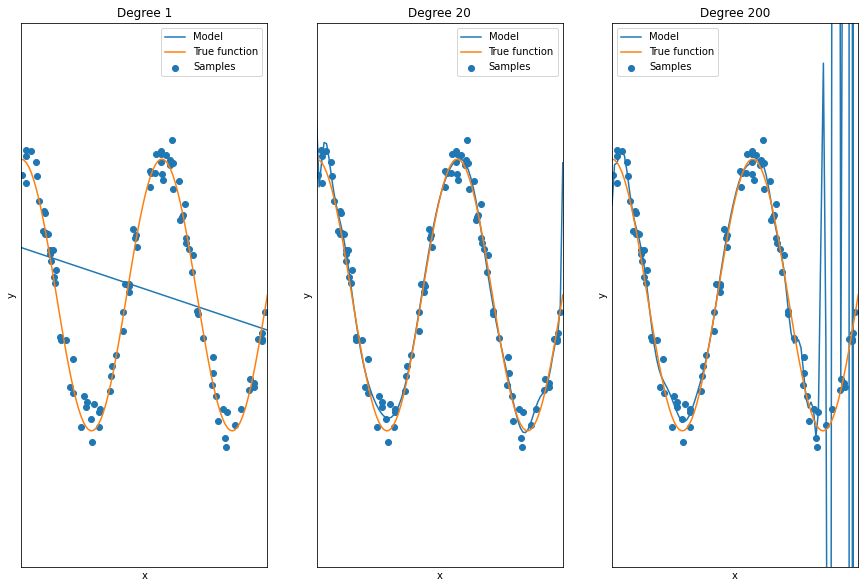

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


np.random.seed(0)

n_samples = 100

degrees = [1, 20, 200]

true_fun = lambda X: np.cos(3.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(15, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                include_bias=False)
    linear_regression = LinearRegression()

    #creating a structure for operation
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                            ("linear_regression", linear_regression)])
    '''
    fitting the model create parameters'''
    pipeline.fit(X[:, np.newaxis], y)


    #Testing
    X_test = np.linspace(0, 1, 100)
    
    yhat = pipeline.predict(X_test[:, np.newaxis])
    plt.plot(X_test, yhat,label="Model")





    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree %d" % degrees[i])
plt.show()


# Overfitting in Decision Tree

In [7]:
np.random.seed(42)
m = 300
X = np.random.rand(m, 1)

y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)

tree_reg3 = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_reg4 = DecisionTreeRegressor(random_state=42, max_depth=12)


tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)
tree_reg3.fit(X_train, y_train)
tree_reg4.fit(X_train, y_train)

train_accuracy1 = tree_reg1.score(X_train, y_train)
test_accuracy1 = tree_reg1.score(X_test, y_test)

train_accuracy2 = tree_reg2.score(X_train, y_train)
test_accuracy2 = tree_reg2.score(X_test, y_test)

train_accuracy3 = tree_reg3.score(X_train, y_train)
test_accuracy3 = tree_reg3.score(X_test, y_test)

train_accuracy4 = tree_reg4.score(X_train, y_train)
test_accuracy4 = tree_reg4.score(X_test, y_test)

print('The training and testing scores of model 1: {} and {},\nThe training and testing scores of model 2: {} and {},\nThe training and testing scores of model 3: {} and {},\nThe training and testing scores of model 4: {} and {}'.format(
      train_accuracy1, test_accuracy1, train_accuracy2, test_accuracy2, train_accuracy3, test_accuracy3, train_accuracy4, test_accuracy4))

The training and testing scores of model 1: 0.7284025487907051 and 0.6631497121055815,
The training and testing scores of model 2: 0.8263754667729518 and 0.7495097644993328,
The training and testing scores of model 3: 0.9166119038068055 and 0.8726741887589177,
The training and testing scores of model 4: 0.9857882012585348 and 0.792481998405627


# Reducing overfitting

## Cross Validation

In [10]:
from sklearn.model_selection import KFold

fold = KFold(n_splits=5, shuffle=True, random_state=42)


for index, (train, test) in enumerate(fold.split(X_train,y_train)):
    X_train_folds = X_train[train]
    y_train_folds = y_train[train]

    X_test_folds = X_train[test]
    y_test_folds = y_train[test]

    tree_reg1.fit(X_train_folds, y_train_folds)
    tree_reg2.fit(X_train_folds, y_train_folds)
    tree_reg3.fit(X_train_folds, y_train_folds)
    tree_reg4.fit(X_train_folds, y_train_folds)


    print(f'Fold {index + 1}')
    print('Accuracy Comparison on model 1 : ', tree_reg1.score(X_train_folds, y_train_folds), tree_reg1.score(X_test_folds, y_test_folds))
    print('Accuracy Comparison on model 2 : ', tree_reg2.score(X_train_folds, y_train_folds), tree_reg2.score(X_test_folds, y_test_folds))
    print('Accuracy Comparison on model 3 : ', tree_reg3.score(X_train_folds, y_train_folds), tree_reg3.score(X_test_folds, y_test_folds))
    print('Accuracy Comparison on model 4 : ', tree_reg4.score(X_train_folds, y_train_folds), tree_reg4.score(X_test_folds, y_test_folds))
    print('')

Fold 1
Accuracy Comparison on model 1 :  0.7039027217102702 0.7408394807567519
Accuracy Comparison on model 2 :  0.7945727542274257 0.8291940040709943
Accuracy Comparison on model 3 :  0.9176367671251768 0.8196858369602101
Accuracy Comparison on model 4 :  0.9905807082196049 0.7569631148316336

Fold 2
Accuracy Comparison on model 1 :  0.7310160147680276 0.5565801539747883
Accuracy Comparison on model 2 :  0.8456832795612195 0.7740597797199216
Accuracy Comparison on model 3 :  0.9326501945612055 0.851937738787277
Accuracy Comparison on model 4 :  0.9964852011537538 0.8135925285715555

Fold 3
Accuracy Comparison on model 1 :  0.7394617816959528 0.7032642545186776
Accuracy Comparison on model 2 :  0.8387755933220886 0.7426707497390879
Accuracy Comparison on model 3 :  0.9233113349875458 0.8478957811079195
Accuracy Comparison on model 4 :  0.9873099631278484 0.8032038413429092

Fold 4
Accuracy Comparison on model 1 :  0.7548374073318077 0.5616874031068637
Accuracy Comparison on model 2 :  

In [11]:
tree_reg2.score(X_train, y_train), tree_reg2.score(X_test, y_test)

(0.8437035020694491, 0.819177028613468)

## Hyperparameter Tuning via Grid Search

In [12]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [13]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [14]:
params = {'max_depth':np.arange(3,6), 
          'max_features':['auto', 'sqrt', 'log2'],
           'splitter': ['best', 'random']
          }

scoring_fnc = make_scorer(performance_metric)
regressor_tree = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(estimator=regressor_tree,param_grid=params,cv=5,scoring=scoring_fnc)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             pre_disp

In [16]:
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [17]:
grid.score(X_train, y_train), grid.score(X_test, y_test)

(0.8973983026085172, 0.8627804827108351)

## Ensemble Methods

In [18]:
from sklearn.ensemble import RandomForestRegressor

regressor_for = RandomForestRegressor(random_state=42, n_jobs=-1)


params = {'max_depth':np.arange(1,6), 
          'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators': [10, 100, 200]
          
          }

scoring_fnc = make_scorer(performance_metric)
grid = GridSearchCV(estimator=regressor_for,param_grid=params,cv=5,scoring=scoring_fnc)

grid.fit(X_train, y_train)


print('The training and testing scores of model 1: {} and {}'.format(grid.score(X_train, y_train), grid.score(X_test, y_test)))

The training and testing scores of model 1: 0.9098966600896439 and 0.8979734271215161


In [19]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Regularisation and Shrinkage

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
params = {'max_depth':np.arange(1,6), 
          'n_estimators' : [10, 50, 100, 200]}

In [22]:
scoring_fnc = make_scorer(performance_metric)
model = GradientBoostingRegressor(random_state=42,learning_rate=0.05)
grid = GridSearchCV(estimator=model,param_grid=params,cv=5,scoring=scoring_fnc)

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.05,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [24]:
grid.score(X_train, y_train), grid.score(X_test, y_test)

(0.9194755862702546, 0.8981492601871974)

## Regularized Linear Models

In [32]:
import numpy as np

np.random.seed(42)
m = 20

X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

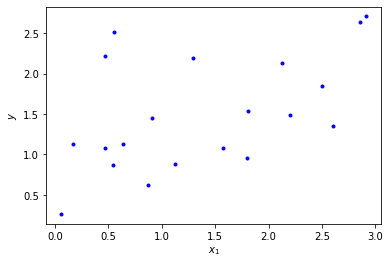

In [38]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.show()

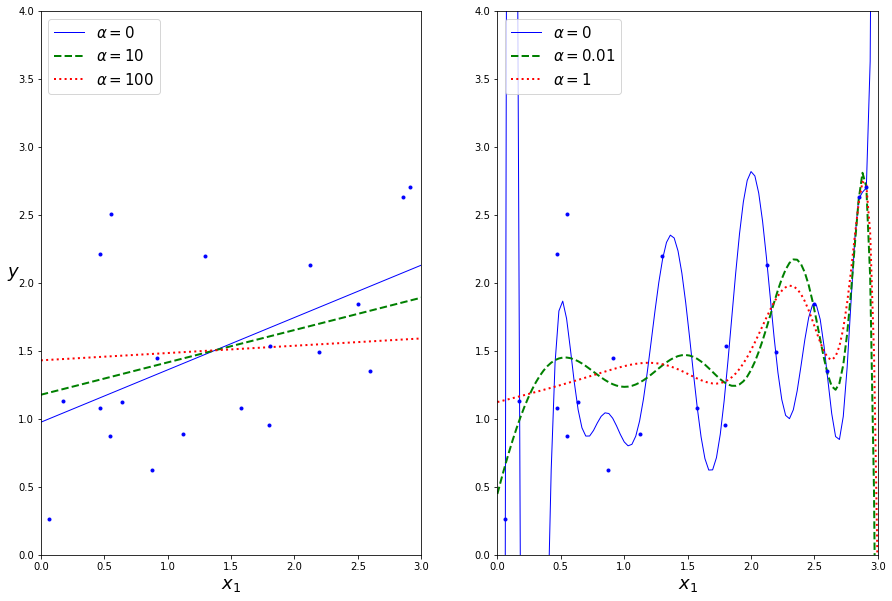

In [43]:
from sklearn.linear_model import Ridge, LinearRegression

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(15,10))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-2, 1), random_state=42)

## Early Stopping

In [44]:
from sklearn.linear_model import SGDRegressor

In [96]:
np.random.seed(42)
m = 100
X = np.random.rand(m, 1)

y = 4 * (X - 0.5) ** 2
y = y + np.random.rand(m, 1) / 10


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.metrics import mean_squared_error

Text(0, 0.5, 'RMSE')

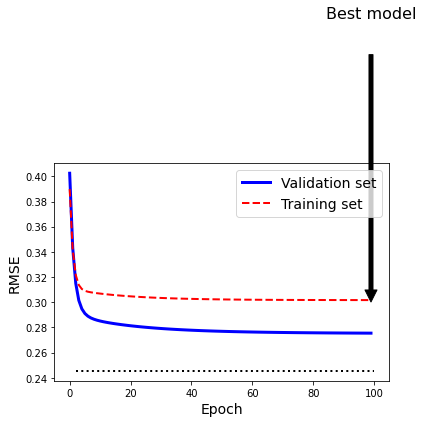

In [101]:

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.005, random_state=42)

n_epochs = 100
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse+0.25),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )

best_val_rmse -= 0.03  
plt.plot([2, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
